# MS proteomics experiment simulation

Showcase using the python package created using functions from the course "Proteomics and package development using python" WS25/26, Molecular Biotechnology.

## Setup

In [ ]:
# ONLY IF YOU ARE A GOOGLE COLAB USER!:

# Mount the google drive for Google Colab users
from google.colab import drive
drive.mount('/content/drive')

import os

# Specify the name of the notebook file to search for
notebook_filename = 'ms_simulation.ipynb'

# Initialize a variable to store the path to the directory containing the notebook
notebook_path = None

# Walk through Google Drive's MyDrive folder to locate the file
for root, dirs, files in os.walk('/content/drive/MyDrive'):
    if notebook_filename in files:
        # If found, store the directory path and exit the loop
        notebook_path = root
        break

# If the notebook file is found, change the working directory to its folder
if notebook_path:
    os.chdir(notebook_path)
    print("Directory changed to:", notebook_path)
else:
    print(f"Notebook file '{notebook_filename}' not found in Google Drive.")

In [22]:
import proteosim as ps
import random
random.seed(42)

## Read in protein fasta file

In [ ]:
protein_map = ps.read_fasta("data/multi_protein_fasta.fasta")
protein_map

{'P11802': 'MATSRYEPVAEIGVGAYGTVYKARDPHSGHFVALKSVRVPNGGGGGGGLPISTVREVALLRRLEAFEHPNVVRLMDVCATSRTDREIKVTLVFEHVDQDLRTYLDKAPPPGLPAETIKDLMRQFLRGLDFLHANCIVHRDLKPENILVTSGGTVKLADFGLARIYSYQMALTPVVVTLWYRAPEVLLQSTYATPVDMWSVGCIFAEMFRRKPLFCGNSEADQLGKIFDLIGLPPEDDWPRDVSLPRGAFPPRGPRPVQSVVPEMEESGAQLLLEMLTFNPHKRISAFRALQHSYLHKDEGNPE',
 'A0A087WTH1': 'MEDEEKAVEILGNTEAAHPPSPIRCCWLRLRCLAATSIICGCSCLGVMALVFAIKAEERHKAGRSEEAVRWGARARKLILASFAVWLAVLILGPLLLWLLSYAIAQAPEPTIDERE',
 'A0A087WTH5': 'MVIEWERPRMILSNTTAVTPFLTKLWQETVQQGGNMSGLARRSPRSGDGKLEALYVLMVLGFFGFFTLGIMLSYIRSKKLEHSNDPFNVYIESNAWQEKDKAYVQARVLESYRSCYVVENHLAIEQPNTHLPETKPSP'}

# Protein digestion

In [24]:
# Choose protease
cleave_pattern = ps.enzyme_cleavage_patterns['Trypsin']
cleave_pattern

'(?<=[KR])(?!P)'

In [25]:
# Digest proteins
digested_peptides_map = ps.digest_protein_collection(
    protein_map=protein_map, 
    cleave_pattern=cleave_pattern,
    )

digested_peptides_map

{'P11802': ['MATSR',
  'YEPVAEIGVGAYGTVYK',
  'DPHSGHFVALK',
  'VPNGGGGGGGLPISTVR',
  'EVALLR',
  'LEAFEHPNVVR',
  'LMDVCATSR',
  'VTLVFEHVDQDLR',
  'TYLDK',
  'APPPGLPAETIK',
  'GLDFLHANCIVHR',
  'DLKPENILVTSGGTVK',
  'LADFGLAR',
  'IYSYQMALTPVVVTLWYR',
  'APEVLLQSTYATPVDMWSVGCIFAEMFR',
  'KPLFCGNSEADQLGK',
  'IFDLIGLPPEDDWPR',
  'DVSLPR',
  'GAFPPR',
  'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK',
  'ISAFR',
  'ALQHSYLHK',
  'DEGNPE'],
 'A0A087WTH1': ['MEDEEK',
  'AVEILGNTEAAHPPSPIR',
  'CCWLR',
  'CLAATSIICGCSCLGVMALVFAIK',
  'SEEAVR'],
 'A0A087WTH5': ['MVIEWERPR',
  'MILSNTTAVTPFLTK',
  'LWQETVQQGGNMSGLAR',
  'SGDGK',
  'LEALYVLMVLGFFGFFTLGIMLSYIR',
  'LEHSNDPFNVYIESNAWQEK',
  'AYVQAR',
  'VLESYR',
  'SCYVVENHLAIEQPNTHLPETKPSP']}

In [26]:
# Compute nr of peptides per protein
for prot, peps in digested_peptides_map.items():
    print(f'{prot}: {len(peps)}')

P11802: 23
A0A087WTH1: 5
A0A087WTH5: 9


In [27]:
# Compute per protein coverage
for prot, peps in digested_peptides_map.items():

    coverage = ps.compute_sequence_coverage(
        protein_seq=protein_map[prot],
        peptides=peps,
        )

    print(f'{prot}: {coverage}')
    

P11802: 92.73927392739274
A0A087WTH1: 50.86206896551724
A0A087WTH5: 93.47826086956522


## Liquid chromatography: peptide separation

In [28]:
pooled_peps = sum(digested_peptides_map.values(), [])

In [29]:
rt_map = ps.predict_lc_retention_times(peptides=pooled_peps)
rt_map

{'MATSR': 8.9,
 'YEPVAEIGVGAYGTVYK': 42.7,
 'DPHSGHFVALK': 29.0,
 'VPNGGGGGGGLPISTVR': 31.6,
 'EVALLR': 25.5,
 'LEAFEHPNVVR': 33.5,
 'LMDVCATSR': 23.6,
 'VTLVFEHVDQDLR': 41.0,
 'TYLDK': 11.1,
 'APPPGLPAETIK': 29.1,
 'GLDFLHANCIVHR': 47.5,
 'DLKPENILVTSGGTVK': 34.5,
 'LADFGLAR': 29.5,
 'IYSYQMALTPVVVTLWYR': 78.1,
 'APEVLLQSTYATPVDMWSVGCIFAEMFR': 96.2,
 'KPLFCGNSEADQLGK': 28.0,
 'IFDLIGLPPEDDWPR': 51.3,
 'DVSLPR': 14.7,
 'GAFPPR': 16.3,
 'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK': 80.9,
 'ISAFR': 19.9,
 'ALQHSYLHK': 28.5,
 'DEGNPE': -4.0,
 'MEDEEK': -0.7,
 'AVEILGNTEAAHPPSPIR': 43.8,
 'CCWLR': 24.6,
 'CLAATSIICGCSCLGVMALVFAIK': 96.2,
 'SEEAVR': 5.7,
 'MVIEWERPR': 30.9,
 'MILSNTTAVTPFLTK': 51.1,
 'LWQETVQQGGNMSGLAR': 39.4,
 'SGDGK': -3.7,
 'LEALYVLMVLGFFGFFTLGIMLSYIR': 140.2,
 'LEHSNDPFNVYIESNAWQEK': 42.6,
 'AYVQAR': 15.6,
 'VLESYR': 18.4,
 'SCYVVENHLAIEQPNTHLPETKPSP': 54.2}

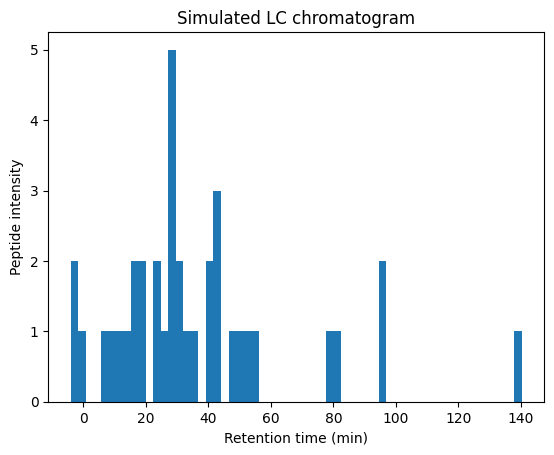

In [30]:
ps.plot_retention_time(retention_times=rt_map.values(), resolution=60)

## Simulate mass spectra

### MS1

In [31]:
select_peps = ps.select_retention_time_window(
    peptide_rt_map=rt_map,
    lower_ret_time=0,
    upper_ret_time=20,
    )

select_peps

['MATSR', 'TYLDK', 'DVSLPR', 'GAFPPR', 'ISAFR', 'SEEAVR', 'AYVQAR', 'VLESYR']

In [32]:
mass_map_ms1 = ps.calculate_mol_mass_collection(
    peptides=select_peps,
    amino_acid_mass_dict = ps.amino_acid_mass_dalton
    )

mass_map_ms1

{'MATSR': 546.65,
 'TYLDK': 620.71,
 'DVSLPR': 667.77,
 'GAFPPR': 625.74,
 'ISAFR': 574.69,
 'SEEAVR': 671.72,
 'AYVQAR': 688.79,
 'VLESYR': 747.86}

In [33]:
mz1_map = ps.calculate_mz_collection(peptide_mass_map=mass_map_ms1, charge=2)
mz1_map

{'MATSR': 274.332,
 'TYLDK': 311.362,
 'DVSLPR': 334.892,
 'GAFPPR': 313.877,
 'ISAFR': 288.35200000000003,
 'SEEAVR': 336.867,
 'AYVQAR': 345.402,
 'VLESYR': 374.937}

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Simulated MS spectrum'}, xlabel='m/z', ylabel='Intensity'>)

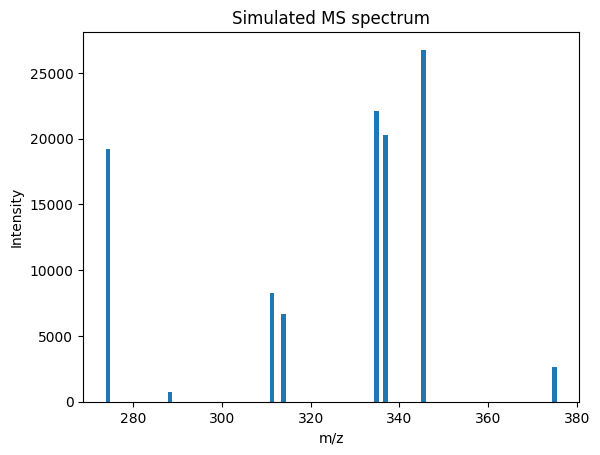

In [34]:
ps.plot_spectrum(mz_values=mz1_map.values(), random_count_range=(0, 30000))

### MS2

In [35]:
# Choose peptide
mypep = select_peps[0]
mypep

'MATSR'

In [36]:
frags = ps.fragment_peptide(peptide=mypep)
frags

['M', 'MA', 'MAT', 'MATS', 'ATSR', 'TSR', 'SR', 'R']

In [37]:
masses_map_ms2= ps.calculate_mol_mass_collection(peptides=frags)
masses_map_ms2

{'M': 131.19,
 'MA': 202.26999999999998,
 'MAT': 303.38,
 'MATS': 390.46,
 'ATSR': 415.46,
 'TSR': 344.38,
 'SR': 243.26999999999998,
 'R': 156.19}

In [38]:
mz2_map = ps.calculate_mz_collection(peptide_mass_map=masses_map_ms2, charge=1)
mz2_map

{'M': 132.197,
 'MA': 203.277,
 'MAT': 304.387,
 'MATS': 391.467,
 'ATSR': 416.467,
 'TSR': 345.387,
 'SR': 244.277,
 'R': 157.197}

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Simulated MS spectrum'}, xlabel='m/z', ylabel='Intensity'>)

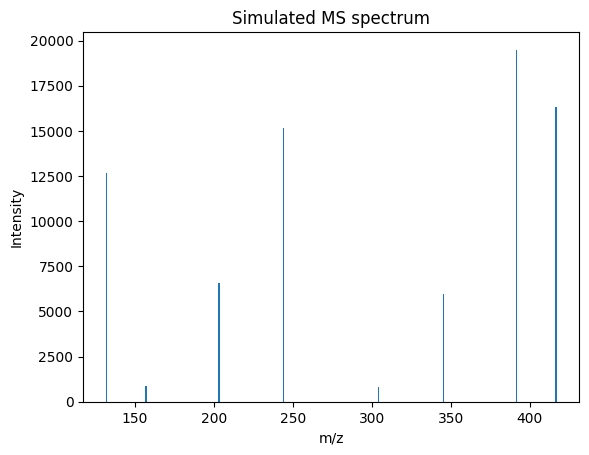

In [39]:
ps.plot_spectrum(mz_values=mz2_map.values(), random_count_range=(0,30000))